Installare le due librerie indicate sotto

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}


Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [4]:
path = "../Dataset FFF/"

In [5]:
path_graph = '../Dataset FFF/Graph_data/'

In [6]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [7]:
community_path = "../Dataset FFF/Community_task/"

In [8]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [9]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [10]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

# 4 - GM

In [9]:
GM_coms = algorithms.greedy_modularity(G, weight = "Count") 

In [10]:
print(print_bold_str("Average Internal Degree:"), GM_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), GM_coms.internal_edge_density())
print(print_bold_str("Conductance:"), GM_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), GM_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), GM_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), GM_coms.modularity_density())
print(print_bold_str("Z Modularity:"), GM_coms.z_modularity())

Average Internal Degree: FitnessResult(min=0.0, max=12.133982947624848, score=2.7396762621706987, std=2.1799363651549863)
Internal Edge Density: FitnessResult(min=0, max=1.0, score=0.6308276383676185, std=0.43804861181072463)
Conductance: FitnessResult(min=0.0, max=1.0, score=0.418274588597738, std=0.30917068994594593)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.4219785345959744, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.41500223435945977, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-560.546879579272, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=2.0792578981852414, std=None)


In [11]:
print(print_bold_str("N_Community:"), len(GM_coms.communities))

max_com_len = 0
for com in GM_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

N_Community: 236
Max_Dim_Community: 1002


In [12]:
with open(community_path+'GM.pickle', 'wb') as f:
    pickle.dump(GM_coms, f)

In [13]:
GM_tuple = [tuple(x) for x in GM_coms.communities]

{'1002': 1, '821': 1, '645': 1, '529': 1, '475': 1, '413': 1, '360': 1, '351': 1, '258': 1, '238': 1, '222': 1, '219': 1, '213': 1, '194': 1, '187': 1, '166': 1, '164': 1, '160': 1, '141': 1, '140': 1, '129': 2, '125': 1, '114': 1, '107': 1, '104': 1, '103': 1, '98': 1, '96': 1, '95': 1, '91': 1, '90': 1, '87': 1, '85': 1, '84': 1, '82': 1, '81': 1, '80': 1, '78': 1, '77': 1, '73': 1, '65': 1, '64': 1, '63': 1, '62': 1, '61': 1, '59': 1, '52': 2, '46': 1, '43': 1, '42': 1, '38': 1, '35': 1, '34': 1, '25': 1, '23': 1, '21': 1, '20': 1, '18': 2, '15': 1, '14': 2, '13': 3, '12': 1, '10': 1, '9': 1, '8': 4, '7': 3, '6': 9, '5': 4, '4': 25, '3': 50, '2': 53, '1': 18}


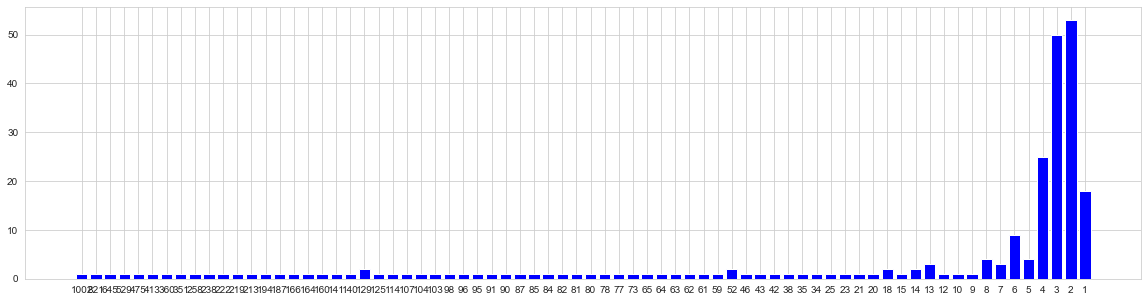

In [14]:
plot_communities_dimentions(GM_tuple)

In [15]:
results = pquality.pquality_summary(G, GM_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.003568,1.000000,0.682914,0.414921
Edges inside,1.000000,4981.000000,133.954128,481.918041
Average Degree,1.000000,12.133983,2.965888,2.115084
FOMD,0.000000,0.500000,0.140016,0.186392
TPR,0.000000,1.000000,0.633923,0.408669
Expansion,0.000000,75.500000,4.083076,7.646390
Cut Ratio,0.000000,0.007288,0.000397,0.000740
Conductance,0.000000,0.986928,0.370242,0.270611
Normalized Cut,0.000000,0.988107,0.372716,0.272761


In [16]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.415002
